# Background

# Imports

In [401]:
from datetime import datetime, timedelta
from dateutil import parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from plotting import config_plots
config_plots()

# Functions

# Main

## Schedule / Progress Plot

In [499]:
sheet_id = '1EzbKnFX4WIXyA44qGYbzsQWjBDsja9BSYjaAtJX03Z0'
gid = '0' # first sheet
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}'

In [500]:
df = pd.read_csv(url)

In [501]:
# dates
df.loc[:,'ExSched'] = df.loc[:,'Example Schedule']
dates = [parser.parse(row.ExSched) for row in df.itertuples()]
df['ExSched_dt'] = pd.to_datetime(dates)
df.loc[:,'ActSched'] = df.loc[:,'Date of change']
#dates_change = [parser.parse(row.ActSched) for row in df.itertuples()]
dates_change = []
for row in df.itertuples():
    try:
        dates_change.append(parser.parse(row.ActSched))
    except:
        dates_change.append(parser.parse('01/01/2200'))
df['ActSched_dt'] = pd.to_datetime(dates_change)

In [502]:
df

,Power Supply ADC,Polarity (+/-),Estimated Current [A],Estimated Field [T],Which NMR?,Example Schedule,Date of change,Time of change,Actual Current [A],Actual Field [T],Scans Done?,Chiller Temp,Notes,ExSched,ExSched_dt,ActSched,ActSched_dt
0,"410,000",+,131.2,0.75,High Field,4/16,04/16/25,16:00,131.2,0.751,y,40 deg F,NaN,4/16,2025-04-16,04/16/25,2025-04-16
1,"500,000",+,160.0,0.91,High Field,4/18,04/18/25,15:50,160.0,0.910,y,55 deg F,NaN,4/18,2025-04-18,04/18/25,2025-04-18
2,"550,000",+,176.1,0.98,High Field,4/22,04/22/25,17:17,176.0,0.980,y,55 deg F,NaN,4/22,2025-04-22,04/22/25,2025-04-22
3,"650,000",+,208.1,1.11,High Field,4/23,04/23/25,18:02,208.1,1.110,y,55 deg F,NaN,4/23,2025-04-23,04/23/25,2025-04-23
4,"750,000",+,240.1,1.21,High Field,4/24,04/24/25,16:50,240.1,1.210,y,40 deg F,NaN,4/24,2025-04-24,04/24/25,2025-04-24
5,"880,000",+,281.7,1.31,High Field,4/25,04/28/25,9:10,281.7,1.310,y,40 deg F,WH closed 4/28,4/25,2025-04-25,04/28/25,2025-04-28
6,"880,000",-,-281.7,1.31,High Field,4/28,04/29/25,9:39,-281.7,1.310,y,40 deg F,NaN,4/28,2025-04-28,04/29/25,2025-04-29
7,"750,000",-,-240.1,1.21,High Field,4/29,4/30/25,9:39,-240.1,1.210,y,40 deg F,NaN,4/29,2025-04-29,4/30/25,2025-04-30
8,"650,000",-,-208.1,1.11,High Field,4/30,05/01/25,16:34,-208.1,1.110,y,40 deg F,NaN,4/30,2025-04-30,05/01/25,2025-05-01
9,"550,000",-,-176.1,0.98,High Field,5/1,05/02/25,14:07,-176.1,0.980,y,55 deg F,NaN,5/1,2025-05-01,05/02/25,2025-05-02


In [503]:
t0_test = np.datetime64(parser.parse('04/22'))

In [504]:
t0_test

numpy.datetime64('2025-04-22T00:00:00.000000')

In [505]:
(df.ActSched_dt < t0_test).sum()

2

In [506]:
df.columns

Index(['Power Supply ADC', 'Polarity (+/-)', 'Estimated Current [A]',
       'Estimated Field [T]', 'Which NMR?', 'Example Schedule',
       'Date of change', 'Time of change', 'Actual Current [A]',
       'Actual Field [T]', 'Scans Done?', 'Chiller Temp', 'Notes', 'ExSched',
       'ExSched_dt', 'ActSched', 'ActSched_dt'],
      dtype='object')

In [507]:
# modify to get step values
t_init = np.datetime64(parser.parse('04/14/25')) # MONDAY
exsched = df.ExSched_dt.values
exsched_plot = np.concatenate([[t_init]]+[[e - np.timedelta64(1, 's'), e] for e in exsched]+
                             [[exsched[-1]+np.timedelta64(1, 'D'), exsched[-1]+np.timedelta64(2, 'D'),
#                                exsched[-1]+np.timedelta64(2, 'D'), exsched[-1]+np.timedelta64(3, 'D')
]])
#n_complete_plot = np.concatenate([[0.]]+[[i-1, i] for i in df.index]+[[df.index.max(), df.index.max(), df.index.max()+1, df.index.max()+1]])
n_complete_plot = np.concatenate([[0.]]+[[i-1, i] for i in df.index]+[[df.index.max(), df.index.max()]])
n_complete_plot[n_complete_plot<0] = 0
# exsched_plot = np.concatenate([[e, e] for e in exsched])

In [516]:
# actual completed based on when we change the current
n_complete_actual = []
everyday0 = np.arange(exsched_plot[0], exsched_plot[-1]+1, dtype='datetime64[D]') - np.timedelta64(1, 's')
everyday1 = np.arange(exsched_plot[0], exsched_plot[-1]+1, dtype='datetime64[D]')
# everyday0 = np.arange(exsched_plot[0], exsched_plot[-1], dtype='datetime64[D]') - np.timedelta64(1, 's')
# everyday1 = np.arange(exsched_plot[0], exsched_plot[-1], dtype='datetime64[D]')
everyday = np.concatenate([[i,j] for i, j in zip(everyday0, everyday1)])
for e in everyday:
    n_comp = np.maximum(np.sum(df.ActSched_dt <= e) - 1, 0)
    n_complete_actual.append(n_comp)
n_complete_actual = np.array(n_complete_actual)
#m_act = (everyday <= np.datetime64('today'))
m_act = (everyday <= np.datetime64('2025-05-23 00:00'))

In [517]:
exsched.astype(datetime)[-1]

1747612800000000000

In [518]:
exsched[-1].astype(datetime)

1747612800000000000

In [519]:
exsched_plot

array(['2025-04-14T00:00:00.000000000', '2025-04-15T23:59:59.000000000',
       '2025-04-16T00:00:00.000000000', '2025-04-17T23:59:59.000000000',
       '2025-04-18T00:00:00.000000000', '2025-04-21T23:59:59.000000000',
       '2025-04-22T00:00:00.000000000', '2025-04-22T23:59:59.000000000',
       '2025-04-23T00:00:00.000000000', '2025-04-23T23:59:59.000000000',
       '2025-04-24T00:00:00.000000000', '2025-04-24T23:59:59.000000000',
       '2025-04-25T00:00:00.000000000', '2025-04-27T23:59:59.000000000',
       '2025-04-28T00:00:00.000000000', '2025-04-28T23:59:59.000000000',
       '2025-04-29T00:00:00.000000000', '2025-04-29T23:59:59.000000000',
       '2025-04-30T00:00:00.000000000', '2025-04-30T23:59:59.000000000',
       '2025-05-01T00:00:00.000000000', '2025-05-05T23:59:59.000000000',
       '2025-05-06T00:00:00.000000000', '2025-05-06T23:59:59.000000000',
       '2025-05-07T00:00:00.000000000', '2025-05-07T23:59:59.000000000',
       '2025-05-08T00:00:00.000000000', '2025-05-08

In [520]:
datetime

datetime.datetime

In [521]:
n_complete_plot

array([ 0.,  0.,  0.,  0.,  1.,  1.,  2.,  2.,  3.,  3.,  4.,  4.,  5.,
        5.,  6.,  6.,  7.,  7.,  8.,  8.,  9.,  9., 10., 10., 11., 11.,
       12., 12., 13., 13., 14., 14., 15., 15., 16., 16., 17., 17., 18.,
       18., 19., 19., 19.])

In [522]:
np.max(exsched_plot)

numpy.datetime64('2025-05-21T00:00:00.000000000')

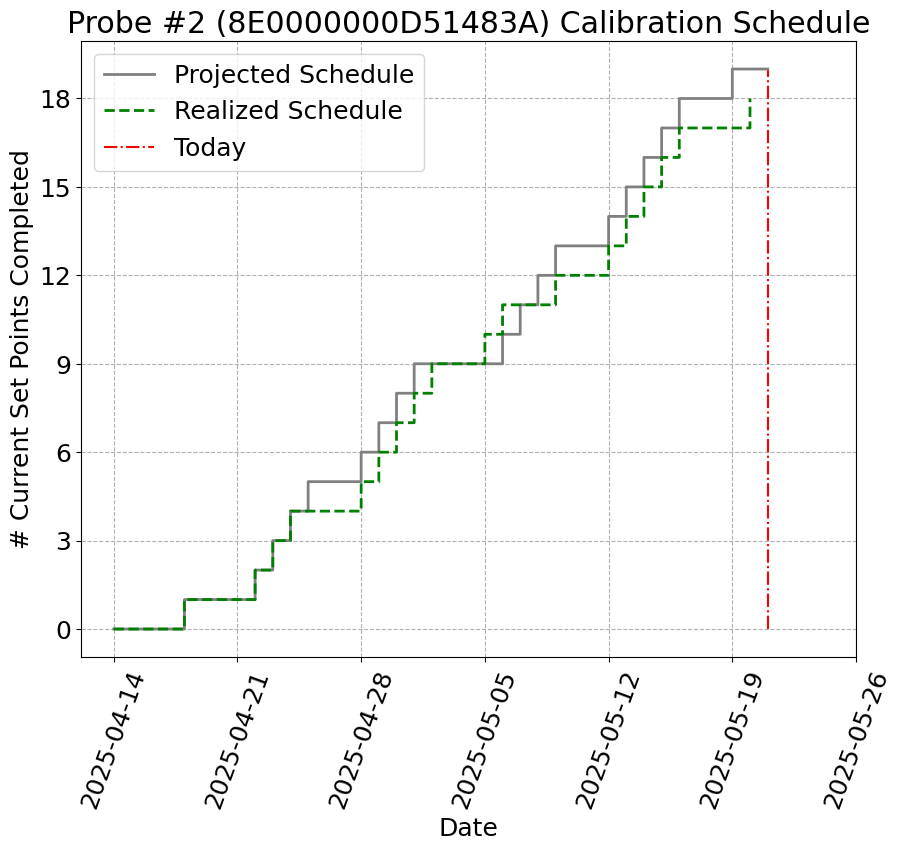

In [523]:
fig, ax = plt.subplots()

ax.plot(exsched_plot, n_complete_plot, color='gray', linewidth=2, label='Projected Schedule', zorder=3)
ax.plot(everyday[m_act], n_complete_actual[m_act], 'g--', linewidth=2, label='Realized Schedule', zorder=4)

# today
#today = np.datetime64('now') # today right now
today = np.datetime64('today') # todays date
ax.plot(2*[today], [0, np.max(n_complete_plot)], 'r-.', label='Today', zorder=2)

# xticks
date_ticks = np.arange(exsched_plot[0], exsched_plot[-1]+np.timedelta64(7, 'D'), dtype='datetime64[D]')[::7]
ax.set_xticks(date_ticks)
ax.tick_params(axis='x', labelrotation=70)

# yticks
n_comp = np.arange(0, n_complete_plot.max()+1, 1)[::3]
ax.set_yticks(n_comp)

ax.set_xlabel('Date')
ax.set_ylabel('# Current Set Points Completed')
ax.set_title('Probe #2 (8E0000000D51483A) Calibration Schedule')
ax.legend(loc='upper left')

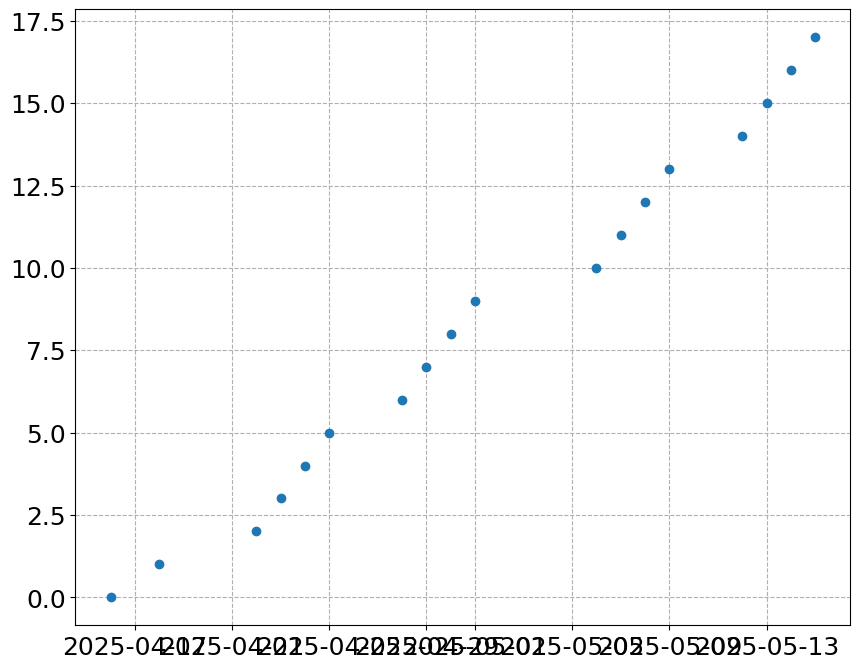

In [18]:
fig, ax = plt.subplots()

ax.scatter(df['ExSched_dt'], df.index)